In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Latent Space vizualizations for mESC_Ag

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 33.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=8d2c4fb211f8faccf933d15a9d77c6327066ff1cdc9ff161ca5f98b4ce7215ad
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=db52148b590e3cd2212c89c725911711e1a3ff3ddbc2f7c40a246f0a21852f95
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
from IPython import display
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib import cm
from matplotlib.colors import Normalize 
from tensorflow import keras
import tensorflow as tf
import scipy.stats as stats
from tensorflow.keras import layers
import tensorflow_probability as tfp
from scipy.stats import gaussian_kde
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
import seaborn as sns
import scipy
import umap
import os

#Load Raw data

Root_Folder = "/content/drive/MyDrive"
data = "gastr"
data_parent_folder = "/Data"
code_parent_folder = "/scMVI"

os.chdir('/content/drive/My Drive/' + code_parent_folder +'/Code')

Met_train=pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/Met_train_" + data + ".csv",",")
CpG_train=pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/CpG_train_" + data + ".csv",",")
Acc_train=pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/Acc_train_" + data + ".csv",",")
GpC_train=pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/GpC_train_" + data + ".csv",",")
Rna_train=pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/Rna_train_" + data + ".csv",",")
Rna_nrm_train=pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/Rna_nrm_train_" + data + ".csv",",")

Met_test=pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/Met_test_" + data + ".csv",",")
CpG_test=pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/CpG_test_" + data + ".csv",",")
Acc_test=pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/Acc_test_" + data + ".csv",",")
GpC_test=pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/GpC_test_" + data + ".csv",",")
Rna_test=pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/Rna_test_" + data + ".csv",",")
Rna_nrm_test=pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/Rna_nrm_test_" + data + ".csv",",")

MMet_train=Met_train.drop(columns=Met_train.columns[0])
MCpG_train=CpG_train.drop(columns=CpG_train.columns[0])
MAcc_train=Acc_train.drop(columns=Acc_train.columns[0])
MGpC_train=GpC_train.drop(columns=GpC_train.columns[0])
MRna_train=Rna_train.drop(columns=Rna_train.columns[0])
MRna_nrm_train=Rna_nrm_train.drop(columns=Rna_nrm_train.columns[0])

MMet_test=Met_test.drop(columns=Met_test.columns[0])
MCpG_test=CpG_test.drop(columns=CpG_test.columns[0])
MAcc_test=Acc_test.drop(columns=Acc_test.columns[0])
MGpC_test=GpC_test.drop(columns=GpC_test.columns[0])
MRna_test=Rna_test.drop(columns=Rna_test.columns[0])
MRna_nrm_test=Rna_nrm_test.drop(columns=Rna_nrm_test.columns[0])

Met_tr=tf.convert_to_tensor(MMet_train,dtype=tf.float32)
Met_tst=tf.convert_to_tensor(MMet_test,dtype=tf.float32)
CpG_tr=tf.convert_to_tensor(MCpG_train,dtype=tf.float32)
CpG_tst=tf.convert_to_tensor(MCpG_test,dtype=tf.float32)
Acc_tr=tf.convert_to_tensor(MAcc_train,dtype=tf.float32)
Acc_tst=tf.convert_to_tensor(MAcc_test,dtype=tf.float32)
GpC_tr=tf.convert_to_tensor(MGpC_train,dtype=tf.float32)
GpC_tst=tf.convert_to_tensor(MGpC_test,dtype=tf.float32)
Rna_tr=tf.convert_to_tensor(MRna_train,dtype=tf.float32)
Rna_tst=tf.convert_to_tensor(MRna_test,dtype=tf.float32)
Rna_nrm_tr = tf.repeat(tf.math.log(tf.convert_to_tensor(MRna_nrm_train,dtype=tf.float32)),repeats=Met_tr.shape[1],axis=1)
Rna_nrm_tst= tf.repeat(tf.math.log(tf.convert_to_tensor(MRna_nrm_test,dtype=tf.float32)),repeats=Met_tr.shape[1],axis=1)

inp_met_sz = Met_tr.shape[1]
inp_acc_sz = Acc_tr.shape[1]
inp_rna_sz = Rna_tr.shape[1]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Load metadata

Rna = pd.concat([Rna_train,Rna_test],axis=0)

gastr_ind_drp = [0,1,2,3,4,5,6,7,8,9]#8 
gastr_QC = pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/sample_metadata_gastr.csv",'\t',index_col=[0])


gastr_QC = gastr_QC.drop(columns=gastr_QC.columns[gastr_ind_drp],axis=1)
gastr_QC.index = gastr_QC.index.str.replace('-','.')

gastr_QC = gastr_QC.loc[Rna.iloc[:,0]]

gastr_ind_drp = [0,1,2,3,4,5,6,7,9,10]#8 
gastr_QC1 = pd.read_csv(Root_Folder + data_parent_folder + "/Data_Gastr/sample_metadata_gastr.csv",'\t',index_col=[0])


gastr_QC1 = gastr_QC1.drop(columns=gastr_QC1.columns[gastr_ind_drp],axis=1)
gastr_QC1.index = gastr_QC1.index.str.replace('-','.')

gastr_QC1 = gastr_QC1.loc[Rna.iloc[:,0]]

In [ ]:
from Models import scMVI_NMT
from Obj_Blocks import *

In [ ]:
#Load model and trained weights
mdl = scMVI_NMT(inp_met_dim = inp_met_sz,inp_acc_dim=inp_acc_sz,inp_rna_dim=inp_rna_sz,intermidiate_dim=100,latent_dimensions=10)
mdl.load_weights(Root_Folder + code_parent_folder + "/Networks/scMVI_scNMT_"+data+"/scMVI_scNMT_"+data) 

In [ ]:
Rna_comb = tf.concat([Rna_tr,Rna_tst],axis=0)
Rna_nrm_comb = tf.concat([Rna_nrm_tr,Rna_nrm_tst],axis=0)
Acc_comb = tf.concat([Acc_tr,Acc_tst],axis=0)
GpC_comb = tf.concat([GpC_tr,GpC_tst],axis=0)

Met_comb = tf.concat([Met_tr,Met_tst],axis=0)
CpG_comb = tf.concat([CpG_tr,CpG_tst],axis=0)


In [ ]:
lt_sp_met,lt_sp_acc,lt_sp_rna = mdl.get_latent([Met_comb,CpG_comb,Acc_comb,GpC_comb,Rna_comb,Rna_nrm_comb ])
lt_sp = mdl.comb_lt([lt_sp_met,lt_sp_acc,lt_sp_rna],'all')

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import umap

#Estimate UMAP projection

reducer = umap.UMAP(random_state=0)

embedding = reducer.fit_transform(lt_sp)
embedding_rna = reducer.transform(lt_sp_rna)
embedding_met = reducer.transform(lt_sp_met)
embedding_acc = reducer.transform(lt_sp_acc)

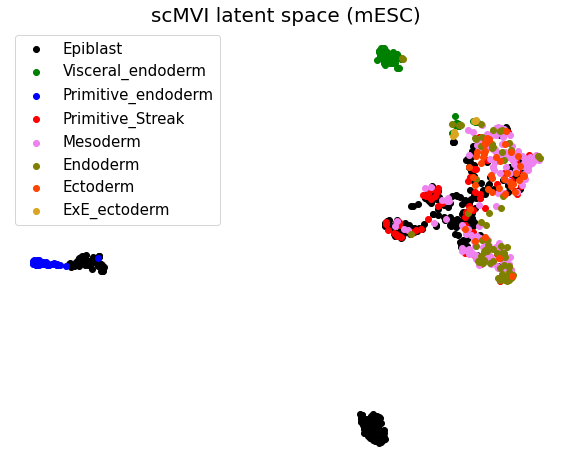

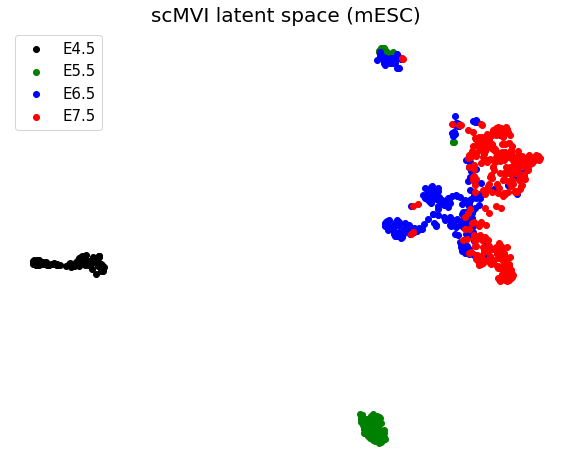

In [ ]:
lst = ["Epiblast","Visceral_endoderm","Primitive_endoderm","Primitive_Streak","Mesoderm","Endoderm","Ectoderm","ExE_ectoderm"]
colors = ["k","g","b","r","#EE82EE","#808000","#FF4500","#DAA520"]

plt.rcParams["figure.figsize"] = (10,8)
for ii in range(len(lst)):
  plt.scatter(embedding[np.where(gastr_QC==lst[ii])[0],0],embedding[np.where(gastr_QC==lst[ii])[0],1],color=colors[ii])

plt.legend(lst,fontsize = 15)
plt.title("scMVI latent space (mESC)",fontsize=20)
plt.axis('off')
#plt.savefig(Root_Folder + code_parent_folder + "/Paper_Plots/scMVI_lt_lin.png", bbox_inches='tight', pad_inches=0)
plt.show()

lst1 = ["E4.5","E5.5","E6.5","E7.5"]
colors = ["k","g","b","r"]

for ii in range(len(lst1)):

    plt.scatter(embedding[np.where(gastr_QC1['stage']==lst1[ii])[0],0],embedding[np.where(gastr_QC1['stage']==lst1[ii])[0],1],color=colors[ii])

plt.legend(lst1,fontsize = 15)
plt.title("scMVI latent space (mESC)",fontsize=20)
plt.axis('off') 
#plt.savefig(Root_Folder + code_parent_folder + "/Paper_Plots/scMVI_lt_stg.png", bbox_inches='tight', pad_inches=0)
plt.show()

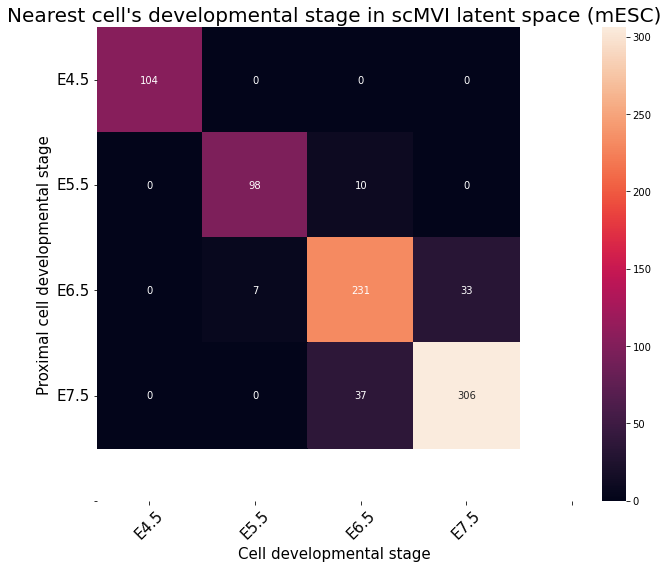

In [ ]:
if data == "gastr":
                x_cell = gastr_QC1
                Y_tst = scipy.spatial.distance.cdist(lt_sp,lt_sp, 'euclidean')
                ss_tst = np.argsort(Y_tst,axis=1)[:,1]

                plt.rcParams["figure.figsize"] = (10,8)
                lbs =  ["E4.5","E5.5","E6.5","E7.5"]

                rot = 45
                rot1 = 0 
                ax= plt.subplot()
                cm = confusion_matrix(x_cell['stage'], x_cell.iloc[ss_tst])
                sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
                x_ticks_list = [0.5,1.5,2.5,3.5,4.5]
                ax.set_xlabel('Cell developmental stage',fontsize=15);ax.set_ylabel('Proximal cell developmental stage',fontsize=15);ax.set_xticks(x_ticks_list);ax.set_xticklabels(lbs,rotation = rot,fontsize=15);ax.set_yticks(x_ticks_list);ax.set_yticklabels(lbs,rotation = rot1,fontsize=15)
                plt.title("Nearest cell's developmental stage in scMVI latent space (mESC)",fontsize=20)
                plt.tight_layout()
                #plt.savefig(Root_Folder + code_parent_folder + "/Paper_Plots/scMVI_lt_quant_"+data+".png")
                plt.show()

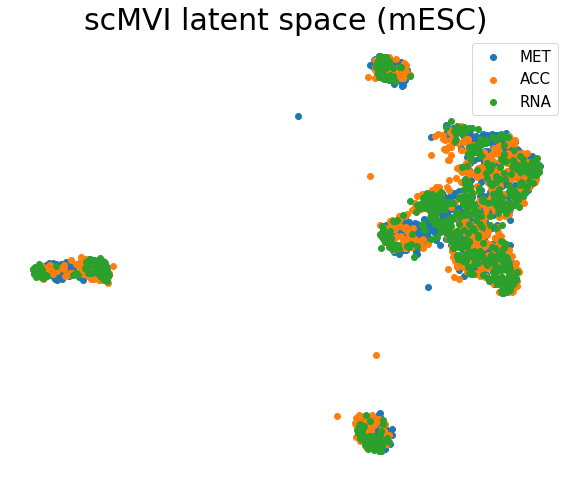

In [ ]:
if data == "gastr":
                time = ['MET','ACC','RNA']
                lb = []
                plt.rcParams["figure.figsize"] = (10,8)
                plt.scatter(embedding_met[:,0],embedding_met[:,1])
                plt.scatter(embedding_acc[:,0],embedding_acc[:,1])
                plt.scatter(embedding_rna[:,0],embedding_rna[:,1])
                plt.legend(time,fontsize=15)
                plt.title("scMVI latent space (mESC)",fontsize=30)
                plt.axis('off')
                #plt.savefig(Root_Folder + "/VAE_new/Paper_Plots/scMVI_lt_int_"+data+".png")
                plt.show()